In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 2000)


# Load data

In [23]:
# Define integer encoding for the 6 classes:
activity_to_code = {'dws': 0, 'ups': 1, 'sit': 2, 'std': 3, 'wlk': 4, 'jog': 5}
code_to_activity = {v:k for k,v in activity_to_code.items()}

In [24]:
# df = pd.read_csv(r'../processed_data_100_25.csv')
# df = pd.read_csv(r'../processed_data_100_50.csv')
# df = pd.read_csv(r'../processed_data_200_50.csv')
# df = pd.read_csv(r'../processed_data_200_100.csv')
# df = pd.read_csv(r'../processed_data_300_75.csv')
# df = pd.read_csv(r'../processed_data_300_150.csv')

df = pd.read_csv(r'../processed_data_time_feat_only.csv')

df = df.drop(columns = ['index_range', 'subject', 'experiment'])

# Convert labels to numbers
df = df.replace(activity_to_code)

#   Shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,attitude.roll_min,attitude.roll_max,attitude.roll_mean,attitude.roll_std,attitude.pitch_min,attitude.pitch_max,attitude.pitch_mean,attitude.pitch_std,attitude.yaw_min,attitude.yaw_max,attitude.yaw_mean,attitude.yaw_std,gravity.x_min,gravity.x_max,gravity.x_mean,gravity.x_std,gravity.y_min,gravity.y_max,gravity.y_mean,gravity.y_std,gravity.z_min,gravity.z_max,gravity.z_mean,gravity.z_std,rotationRate.x_min,rotationRate.x_max,rotationRate.x_mean,rotationRate.x_std,rotationRate.y_min,rotationRate.y_max,rotationRate.y_mean,rotationRate.y_std,rotationRate.z_min,rotationRate.z_max,rotationRate.z_mean,rotationRate.z_std,userAcceleration.x_min,userAcceleration.x_max,userAcceleration.x_mean,userAcceleration.x_std,userAcceleration.y_min,userAcceleration.y_max,userAcceleration.y_mean,userAcceleration.y_std,userAcceleration.z_min,userAcceleration.z_max,userAcceleration.z_mean,userAcceleration.z_std,activity
0,-0.008153,-0.001023,-0.004610,2.091339e-03,-0.002101,-0.000261,-0.001181,0.000539,0.016088,0.016088,0.016088,6.315090e-18,-0.008146,-0.001022,-0.004606,2.089522e-03,-0.015540,-0.013707,-0.014682,5.379434e-04,-0.000846,-0.000838,-0.000843,0.000003,-0.031633,0.034263,-0.000370,0.013026,-0.016925,0.012693,-0.001459,0.006964,-0.031560,0.032991,-0.000141,0.016345,0.011776,0.011776,0.011776,4.549736e-18,0.021553,0.021553,0.021553,9.905569e-18,-0.016763,0.015776,0.000039,5.578234e-03,2
1,-0.644723,-0.046877,-0.357803,1.939377e-01,-0.086185,0.076165,-0.002853,0.049016,0.911753,0.911753,0.911753,1.115816e-16,-0.097329,0.097329,-0.004783,7.063720e-02,0.954939,0.954939,0.954939,1.115816e-16,-0.102513,0.102513,-0.005038,0.074400,-1.022821,1.146918,0.036046,0.608455,-0.829564,0.167725,-0.409842,0.300209,-0.474916,0.475026,0.044100,0.326454,0.048081,0.048081,0.048081,1.394770e-17,-0.244231,0.257215,0.003673,1.574845e-01,-0.212732,0.142412,0.006545,8.572673e-02,0
2,0.009870,0.031283,0.018903,6.260346e-03,-0.002082,0.007318,0.001728,0.002935,-2.535533,-2.499016,-2.518849,1.072741e-02,-0.022079,-0.021761,-0.021933,9.341049e-05,0.928448,0.928448,0.928448,4.463264e-16,-0.038141,-0.037591,-0.037890,0.000161,0.000316,0.003801,0.001665,0.001135,0.013275,0.032556,0.026857,0.005949,-0.017674,0.026566,0.005053,0.012835,-0.001647,-0.000965,-0.001307,2.001260e-04,0.006232,0.006232,0.006232,1.743463e-18,0.023200,0.023200,0.023200,3.486925e-18,3
3,1.110195,1.110195,1.110195,4.401467e-16,0.001433,0.002961,0.001864,0.000416,-0.005477,-0.004287,-0.004867,3.491893e-04,0.856659,0.856659,0.856659,3.185455e-16,0.291359,0.291359,0.291359,1.106010e-16,0.003085,0.003561,0.003342,0.000140,-0.013338,0.015639,-0.000075,0.006853,-0.012370,0.015215,0.002122,0.007240,-0.015169,0.022221,0.000684,0.008600,-0.003404,-0.002711,-0.003060,2.033293e-04,0.003161,0.003161,0.003161,1.214181e-18,-0.005124,-0.004080,-0.004606,3.060366e-04,2
4,-0.388994,0.829589,0.228192,3.371727e-01,-0.165406,0.137914,-0.007179,0.095765,-0.745485,0.359526,-0.237943,3.162409e-01,-0.007535,0.002321,0.000192,2.270290e-03,0.951817,0.951817,0.951817,0.000000e+00,-0.193183,0.098592,-0.061802,0.080482,-1.303045,0.823637,-0.014447,0.482244,-1.926763,1.146790,-0.196842,0.605595,-0.703886,0.925431,0.104556,0.374599,-0.095088,0.243840,0.072307,8.352300e-02,0.124321,0.124321,0.124321,0.000000e+00,-0.550394,0.546334,-0.015183,2.479836e-01,0


# Train SVC models with stratifiedKfold cross validation

In [25]:
data = df.drop(columns = ['activity']).to_numpy()
label = df['activity'].to_numpy()

skf = StratifiedKFold(5)

In [26]:
print(data.shape)
print(label.shape)

(55247, 48)
(55247,)


In [30]:
accuracies = []
matrixes = []
models = []
attempt = 1

for train_index, test_index in skf.split(data, label):
    print("TRAIN ATTEMPT: ", attempt)
    attempt = attempt + 1
    
    # Split train and test data
    train, train_label = data[train_index], label[train_index]
    test, test_label = data[test_index], label[test_index]
    
    # Initialize and train SVC model
    clf = svm.SVC(kernel='rbf')
    clf = clf.fit(train, train_label)
    
    # Save SVC model to a list
    models.append(clf)

    # Make predictions on test data
    predict_label = clf.predict(test)
    
    # Record prediction accuracy
    acc = accuracy_score(test_label, predict_label)
    print("ACCURACY: ", acc)
    accuracies.append(acc)
    
    # Record confusion matrix
    matrix = confusion_matrix(y_true=test_label, y_pred=predict_label)
    matrixes.append(matrix)

accuracies = np.around(accuracies, decimals = 4)
print("Accuracy values: ", accuracies)
print("Average accuracy: ", np.mean(accuracies))

TRAIN ATTEMPT:  1
ACCURACY:  0.9913122171945702
TRAIN ATTEMPT:  2
ACCURACY:  0.9910407239819005
TRAIN ATTEMPT:  3
ACCURACY:  0.991039913114309
TRAIN ATTEMPT:  4
ACCURACY:  0.9921259842519685
TRAIN ATTEMPT:  5
ACCURACY:  0.9911304190424473
Accuracy values:  [0.9913 0.991  0.991  0.9921 0.9911]
Average accuracy:  0.9913000000000001


# Inspect Confusion Matrix

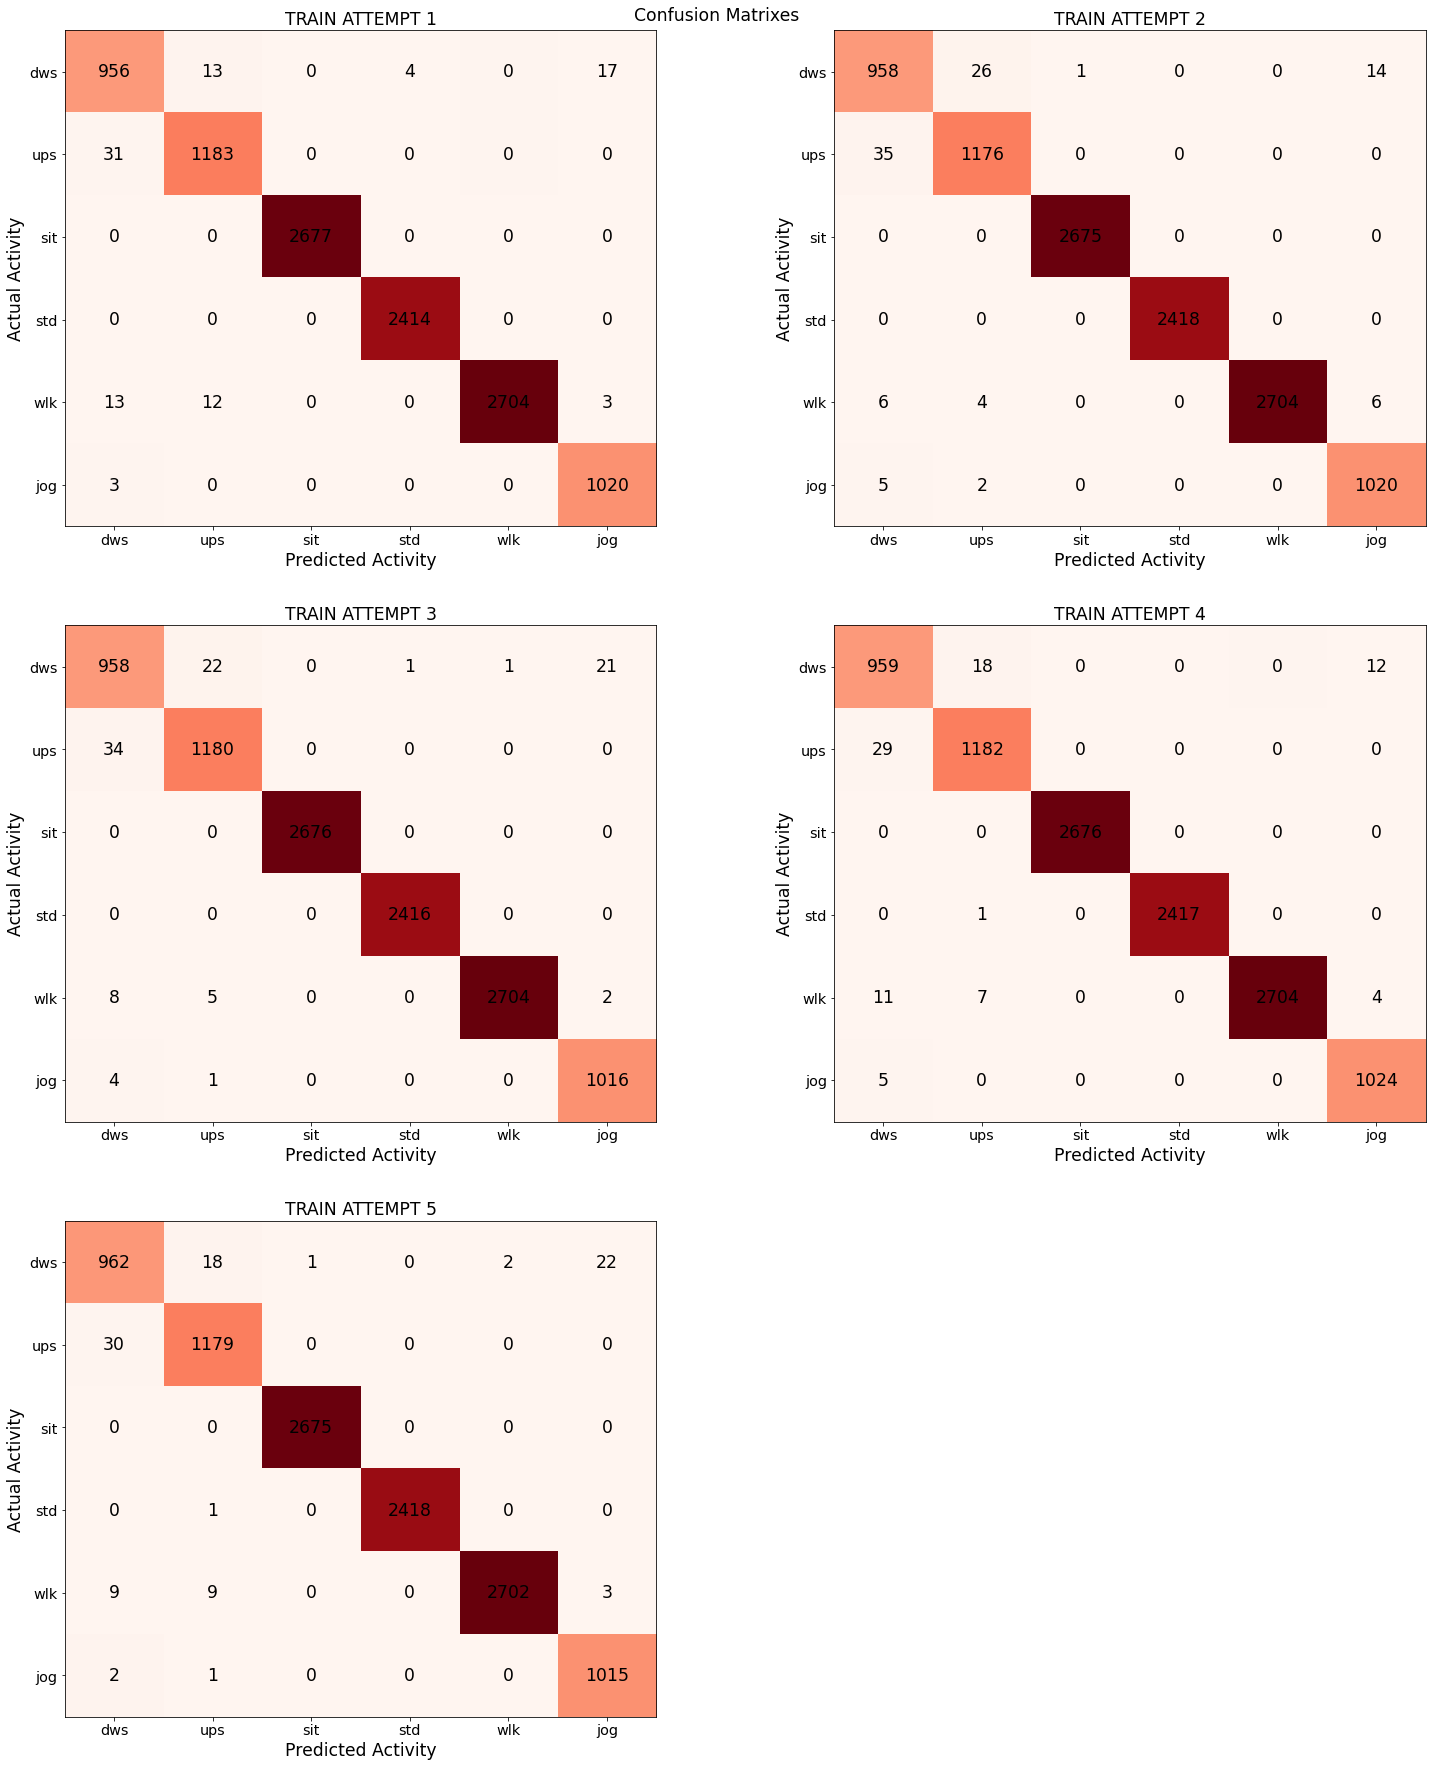

In [31]:
activities = ['dws', 'dws', 'ups', 'sit', 'std', 'wlk', 'jog']

fig = plt.figure(figsize = (20,25))
fig.suptitle("Confusion Matrixes", fontsize = "xx-large")

for index, m in enumerate(matrixes):
    sp = fig.add_subplot(3,2,index + 1)
    sp.imshow(m, cmap="Reds", aspect='auto')
    sp.set_title("TRAIN ATTEMPT " + str(index + 1), fontsize = "xx-large")

    for i in range(6):
        for j in range(6):
            sp.text(i, j, m[i, j], ha="center", va="center", color="black", fontsize = "xx-large")

    sp.set_xticklabels(activities, fontsize = "x-large")
    sp.set_yticklabels(activities, fontsize = "x-large")
    
    sp.set_ylabel("Actual Activity", fontsize = "xx-large")
    sp.set_xlabel("Predicted Activity", fontsize = "xx-large")

fig.tight_layout()
fig.subplots_adjust(wspace = 0.3, hspace = 0.2)
plt.show()

# Testing prediction

In [32]:
models[1].predict(test[:10])

array([5, 5, 0, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [33]:
label[:10]

array([2, 0, 3, 2, 0, 4, 5, 2, 2, 5], dtype=int64)